In [120]:
# need probility of getting cancer across my population which is subset of world.  
# continuous and normal

# mean
# var
# stderr

# need linspace
# similar examples?

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [232]:
# pull in df_combo
df = pd.read_csv('../data/combo.csv')
# get the lowest 9 countries' animal consumption (values < 100 kg / yr, about 1/4 of top consumers)
df_ha = df.sort_values('animal_product_kg_cap_yr', ascending=True).head(9)
df_ha

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr
59,59,Zimbabwe,ZWE,421.8,426933.6,1142.2,873306.0,0.098798,2008,47.34
41,41,Philippines,PHL,4568.6,6660518.0,15969.8,14031144.0,0.068592,2008,48.54
53,53,Uganda,UGA,836.8,977310.2,1600.2,2242928.8,0.085623,2008,51.83
58,58,Viet Nam,VNM,1750.2,3374945.2,5763.2,6028657.4,0.051859,2008,57.07
51,51,Thailand,THA,4687.8,5928952.0,20427.2,11604312.2,0.079066,2008,62.09
40,40,Peru,PER,2315.0,2602317.0,11854.0,5582951.4,0.088959,2008,81.67
23,23,India,IND,11593.4,23535480.8,42447.8,47320280.6,0.049259,2008,82.21
34,34,Malaysia,MYS,648.6,796360.0,2793.8,1745800.0,0.081446,2008,89.28
11,11,China,CHN,33324.2,31062495.4,195833.6,62966872.8,0.107281,2008,99.99


In [235]:
df_m = df.sort_values('animal_product_kg_cap_yr', ascending=False).head(51)

In [190]:
#stats ( NOT Weighted by population, just to see rough numbers)
alpha = 0.5

tot_pop = df['P20_49'].sum()
tot_cases = df['N20_49'].sum()

avg_by_countrt = df['Incidence Per Age Capita'].mean()  # in percents
avg_by_countrt  # unweighted 0.11982619244223523

0.11982619244223523

In [191]:
mean = tot_cases / tot_pop * 100
mean   # 0.1319977 % prob of getting cancer this year, as a percent, H0.

0.13199772829376133

In [192]:
# rough variance
var_unweighted = df['Incidence Per Age Capita'].var()
var_unweighted  # 0.0018404

0.0018404001354832195

In [248]:
# cleanup 
cols = ['wav_num','wav_var_num']
for col in cols:
    if col in df_ha.columns:
        df_ha = df_ha.drop(columns=col, axis=1)
        
cols = ['wav_num', 'wav_var_num']
for col in cols:
    if col in df.columns:
        df = df.drop(columns=col, axis=1)
        
df_m

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr
36,36,Netherlands,NLD,10776.2,6763283.2,100744.6,16607871.8,0.159334,2008,435.84
33,33,Lithuania,LTU,2007.8,1291492.6,18644.8,3094863.4,0.155464,2008,398.79
24,24,Ireland,IRL,3517.8,2069016.8,28503.4,4547899.0,0.170023,2008,398.72
50,50,Switzerland,CHE,3144.4,1915416.2,28305.8,4394036.4,0.164163,2008,393.84
56,56,United States of America,USA,191467.0,126645443.2,1511097.8,309126896.8,0.151183,2008,389.98
26,26,Italy,ITA,19712.2,10240602.6,177854.0,24602392.8,0.192491,2008,365.87
17,17,Denmark,DNK,5016.4,2189753.4,46850.2,5541244.6,0.229085,2008,358.53
47,47,Slovenia,SVN,1372.0,889724.6,13029.8,2044596.6,0.154205,2008,356.75
21,21,Germany,DEU,39885.8,21752904.4,413475.2,53057190.6,0.183359,2008,350.77
2,2,Australia,AUS,15008.4,9393734.8,119559.2,22003467.8,0.159770,2008,347.19


In [225]:
# Weighted average mean, by P20_49, on low meat population

df_ha['wav_num'] = df_ha['Incidence Per Age Capita'] * df_ha['P20_49']
df_ha['wav_num'].sum()
wav_num_ha = df_ha['wav_num'].sum()
wav_denom_ha = df_ha['P20_49'].sum()

wav_mean_ha = wav_num_ha / wav_denom_ha
wav_mean_ha  # correction -> 0.07980647627437283

0.07980647627437283

In [249]:
# Weighted average mean, by P20_49, on meat population

df_m['wav_num'] = df_m['Incidence Per Age Capita'] * df_m['P20_49']
df_m['wav_num'].sum()
wav_num_m = df_m['wav_num'].sum()
wav_denom_m = df_m['P20_49'].sum()

wav_mean_m = wav_num_m / wav_denom_m
wav_mean_m  # correction -> 0.07980647627437283

0.1440445480128959

In [226]:
# Weighted avg Sum of the Squares, for variance calc
df_ha['wav_var_num'] = df_ha['P20_49'] * (df_ha['Incidence Per Age Capita'] - wav_mean_ha) ** 2
wav_var_num_ha = df_ha['wav_var_num'].sum()
wav_var_ha = wav_var_num_ha / wav_denom_ha
wav_var_ha  # 0.0009339868390240288, about half

wav_std_ha = np.sqrt(wav_var_ha)
wav_var_ha  #0.0006540628683989175

0.0006540628683989175

In [227]:
#WAV mean for full data set, should match calc'd mean
# Weighted average mean, by P20_49

df['wav_num'] = df['Incidence Per Age Capita'] * df['P20_49']
df['wav_num'].sum()
wav_num = df['wav_num'].sum()
wav_denom = df['P20_49'].sum()
wav_mean = wav_num / wav_denom
wav_mean  # 0.13199772829376136

0.13199772829376136

In [228]:
# weighted sum of the squares
# for each row, I need weighti * (vali - mean)^2

df['wav_var_num'] = df['P20_49'] * (df['Incidence Per Age Capita'] - wav_mean) ** 2
wav_var_num = df['wav_var_num'].sum()
wav_var = wav_var_num / wav_denom
wav_var  # 0.0013987364897593152, just a little lower than rough var. 

wav_std = np.sqrt(wav_var)
wav_var  # 0.0013987364897593152

0.0013987364897593152

In [198]:
# var/stdev how to weight by popln?
# if each country is equal
arr = np.array(df.loc[:,'Incidence Per Age Capita'])
var = arr.var()
n = len(arr)
se = var / np.sqrt(n)
se 


0.00023363472523887704

In [247]:


tot_pop_ha = df_ha['P20_49'].sum()
tot_cases_ha = df_ha['N20_49'].sum()
mean_ha = tot_cases_ha / tot_pop_ha * 100
arr_ha = np.array(df_ha.loc[:,'Incidence Per Age Capita'])
var_ha = arr_ha.var()
n_ha = len(arr_ha)
se_ha = var_ha / np.sqrt(n_ha)

wav_std_ha = np.sqrt(wav_var_ha)
mean_ha  #0.07980647627437282


0.07980647627437282

In [218]:
# Let's get plotting, buwhaha
## normal dist, h0 and ha
#dist = stats.norm(wav_mean, wav_std)
#dist_ha = stats.norm(wav_mean_ha, wav_std_ha )

dist = stats.norm(wav_mean, wav_var / np.sqrt(60))
dist_ha = stats.norm(wav_mean_ha, wav_var_ha / np.sqrt(9))

In [219]:
wav_mean
wav_mean_ha

0.07980647627437283

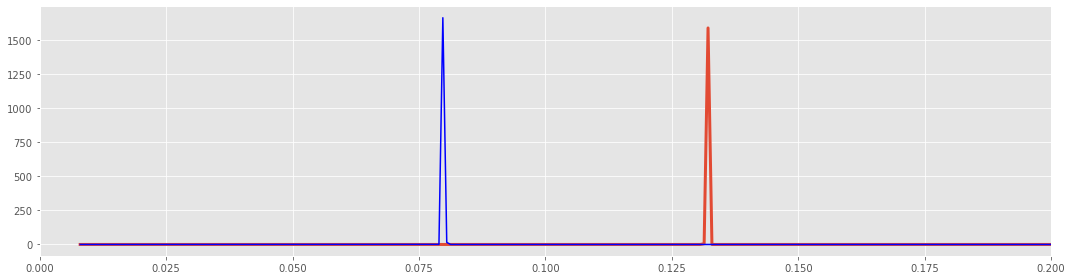

In [258]:
fig, ax = plt.subplots(1, figsize=(15, 4))
x = np.linspace(0.008, 0.2, num=250)
pdf = dist.pdf(x)
pdf_ha = dist_ha.pdf(x)
ax.plot(x, pdf, linewidth=3)
ax.plot(x, pdf_ha, color='b')

# $\mu$
# $\bar x$
# $\alpha$
ax.set_xlim((0,.2))


#ax.set_title("H0 vs Ha")

ax.set_xlabel = "Probability of Getting Cancer 2012 Age 20-49"
ax.set_ylabel = "PDF"

#ax.legend(loc='best')

plt.tight_layout()


In [170]:
compute_confidence_interval(arr, 0.05)  # but this date is unweighted.

(0.11948180653614145, 0.12017057834832902)

In [238]:
# Shared sample freq = number of cases in each set / total po

# shared sample variance = total_pop * (shared_sample_freq * ( 1 - shared_sample_freq)) / pop_m * pop_v

tot_pop_m = df_m['P20_49'].sum()
tot_cases_m = df_m['N20_49'].sum()

tot_pop_v = df_ha['P20_49'].sum()
tot_cases_v = df_ha['N20_49'].sum()

total_pop = tot_pop_m + tot_pop_v

In [243]:

# shared_sample_freq = (58.0 + 65.0) / 180
shared_sample_freq = (tot_cases_m + tot_cases_v) / total_pop  # same as mean (.0013199772)

# shared_sample_variance = 180 * (shared_sample_freq * (1 - shared_sample_freq)) / 8000
shared_sample_variance = total_pop * (shared_sample_freq * (1 - shared_sample_freq)) / (tot_pop_m * tot_pop_v)  # suuuper small 2.1528615317495398e-11

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
shared_sample_freq
shared_sample_variance

var_df = df['Incidence Per Age Capita'].var()  # 0.0018404001354832195

0.0018404001354832195

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

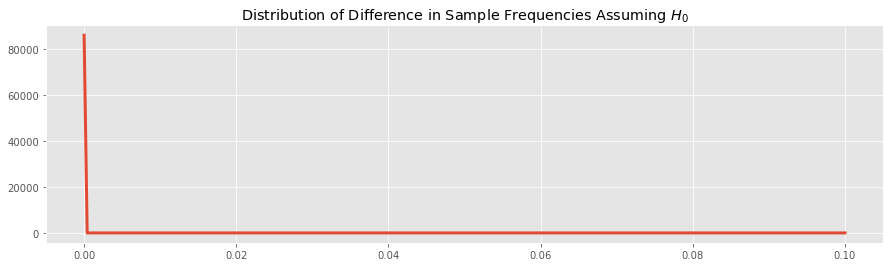

In [250]:
fig, ax = plt.subplots(1, figsize=(15, 4))
x = np.linspace(0, 0.1, num=250)
pdf = difference_in_proportions.pdf(x)

ax.plot(x, pdf, linewidth=3)

ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")


In [251]:
# cdf
difference_in_proportions.cdf()


TypeError: cdf() missing 1 required positional argument: 'x'

In [252]:
#meat_sample_freq = 58.0 / 80
#vegan_sample_freq = 65.0 / 100
#difference_in_sample_proportions = meat_sample_freq - vegan_sample_freq
#print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.07


In [254]:
meat_sample_freq = tot_cases_m / tot_pop_m
vegan_sample_freq = tot_cases_v / tot_pop_v
difference_in_sample_proportions = meat_sample_freq - vegan_sample_freq
print("Difference in sample proportions: {:2.8f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.00064238


In [257]:
# So the p-value for our experiment is
# 𝑃(Difference in proportions equal to or more extreme than observed∣Null hypothesis)

p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for kickfip frequency comparison: {:2.16f}".format(p_value))
 


p-value for kickfip frequency comparison: 0.0000000000000000
